In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils.constant import EXP_DIR, EXP_METRIC_DIR

In [2]:
model = ["gpt-4o", "gpt-4o-mini"]
attack = ["Baseline", "OMI", "GHI", "CSI"]
defence = ["No Defence", "Defence"]
attack_rate = [0.3, 0.5, 0.7, 1]

In [3]:
precision_gpt_4o_OMI_none = [0.6, 0, 0, 1]
precision_gpt_4o_OMI_defence = [1, 0, 0, 0.67]
precision_gpt_4o_GHI_none = [0, 0, 0, 0]
precision_gpt_4o_GHI_defence = [0.9, 0, 0, 1]

In [4]:

gpt_4o_precision = {
    "attack rate": [0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1
                    ],
    "precision": [0.6, 0.8, 0.8, 1,    
                  1, 1, 0.8, 1,
                  0, 0, 0, 0,
                  0.9, 0.6, 1, 1
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", 
                    "OMI","OMI","OMI","OMI",
                    "GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",               
                ],
    
}



/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

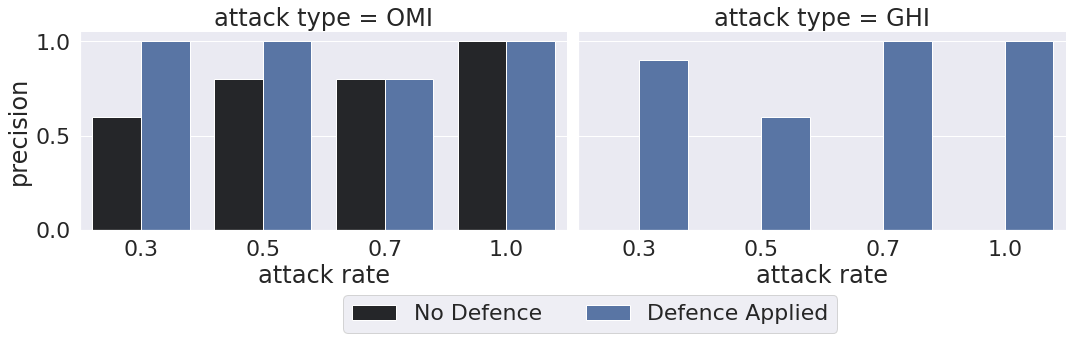

In [5]:
sns.set(font_scale=2)
df = pd.DataFrame(gpt_4o_precision)
g = sns.FacetGrid(df, col='attack type',  margin_titles=True, height=5, aspect=1.5)
g.map(sns.barplot, 'attack rate', 'precision', "defence")
# g.add_legend()
plt.subplots_adjust(bottom=0.35)
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.55, 0.2), ncol=len(labels))
plt.savefig(f"{EXP_DIR}/precision.png", bbox_inches='tight')
plt.show()

In [6]:
recall_gpt_4o_OMI_none = [0.25, 0, 0, 0.28]
recall_gpt_4o_OMI_defence = [0.4, 0, 0, 0.26]
recall_gpt_4o_GHI_none = [0, 0, 0, 0]
recall_gpt_4o_GHI_defence = [0.54, 0, 0, 0.25]


In [7]:
gpt_4o_recall = {
    "attack rate": [0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1
                    ],
    "recall": [0.25, 0.33, 0.19, 0.24,    
                0.4, 0.31, 0.21, 0.33,
                0, 0, 0, 0,
                0.54, 0.13, 0.37, 0.32
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", 
                    "OMI","OMI","OMI","OMI",
                    "GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                ],
    
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

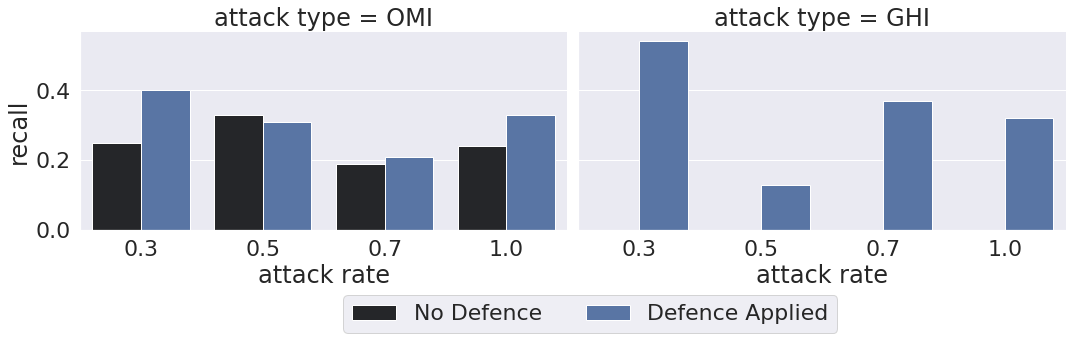

In [8]:
df = pd.DataFrame(gpt_4o_recall)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True, height=5, aspect=1.5)
g.map(sns.barplot, 'attack rate', 'recall', 'defence')
# g.add_legend()
plt.subplots_adjust(bottom=0.35)
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.55, 0.2), ncol=len(labels))
plt.savefig(f"{EXP_DIR}/precision.png", bbox_inches='tight')
plt.show()

In [9]:
f1_gpt_4o_OMI_none = [0.35, 0, 0, 0.41]
f1_gpt_4o_OMI_defence = [0.55, 0, 0, 0.37]
f1_gpt_4o_GHI_none = [0, 0, 0, 0]
f1_gpt_4o_GHI_defence = [0.65, 0, 0, 0.39]

In [10]:
gpt_4o_f1 = {
    "attack rate": [0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1
                    ],
    "f1": [0.35, 0.46, 0.3, 0.39,  
               0.55, 0.46, 0.33, 0.47,
                  0, 0, 0, 0,
               0.65, 0.21 , 0.52, 0.46
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", 
                    "OMI","OMI","OMI","OMI",
                    "GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",               
                ],
    
    
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

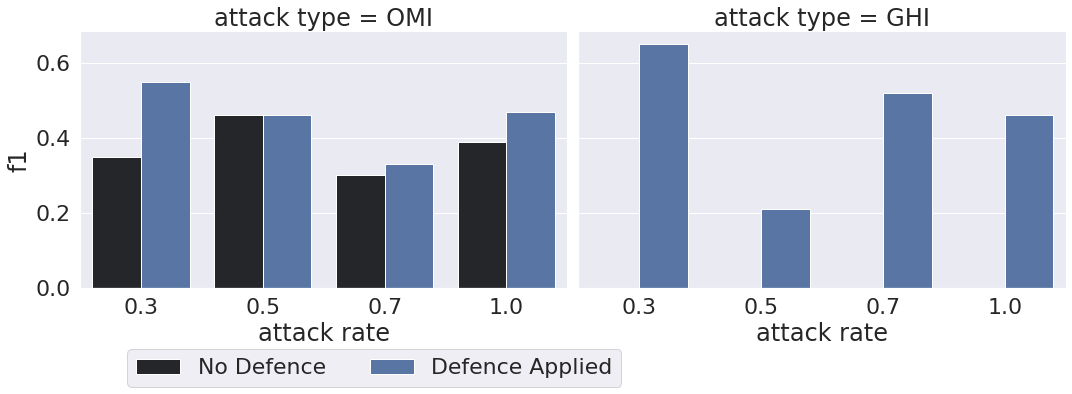

In [11]:
df = pd.DataFrame(gpt_4o_f1)
g.fig.set_size_inches(10, 6)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True, height=5, aspect=1.5)
g.map(sns.barplot, 'attack rate', 'f1', 'defence')
# g.add_legend()
# for ax in g.axes.flat:
#     handles, labels = ax.get_legend_handles_labels()
#     if handles:
#         g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels))
#         break
# plt.subplots_adjust(bottom=0.35)
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.35, 0.05), ncol=len(labels))

plt.savefig(f"{EXP_DIR}/f1.png", bbox_inches='tight')
plt.show()

In [12]:
MOER = {
    "attack rate": [0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1
                    ],
    "MOER": [0.5, 0.17, 0.13, 0.25, 0.26, 
               0.5, 0.48, 0.29, 0.4,0.67,
                  0.5, 0.16, 0.14, 0.1, 0.13,
               0.5, 0.33, 0.48, 0.132, 0.14
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", "OMI", 
                    "OMI","OMI","OMI","OMI","OMI", 
                    "GHI","GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied", "Defence Applied",             
                ],
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

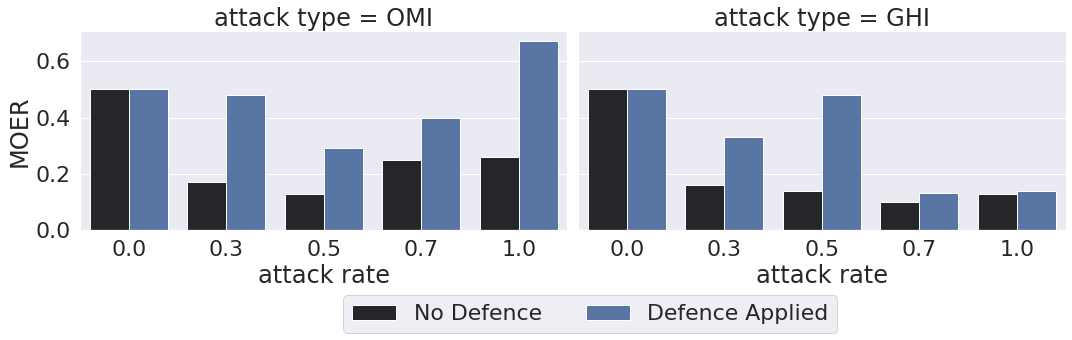

In [13]:
df = pd.DataFrame(MOER)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True, height=5, aspect=1.5)
g.map(sns.barplot, 'attack rate', 'MOER', 'defence')
# g.add_legend()
plt.subplots_adjust(bottom=0.35)
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.55, 0.2), ncol=len(labels))
plt.savefig(f"{EXP_DIR}/moer.png", bbox_inches='tight')
plt.show()

In [14]:
token = {
    "attack rate": [0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1
                    ],
    "token": [1204, 1198, 1194, 1162, 1154, 
            1204, 1230, 1211, 1216,1207,
            1204, 1203, 1204, 1186, 1188,
            1204, 1219, 1225, 1222, 1206
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", "OMI", 
                    "OMI","OMI","OMI","OMI","OMI", 
                    "GHI","GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied", "Defence Applied",             
                ],
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

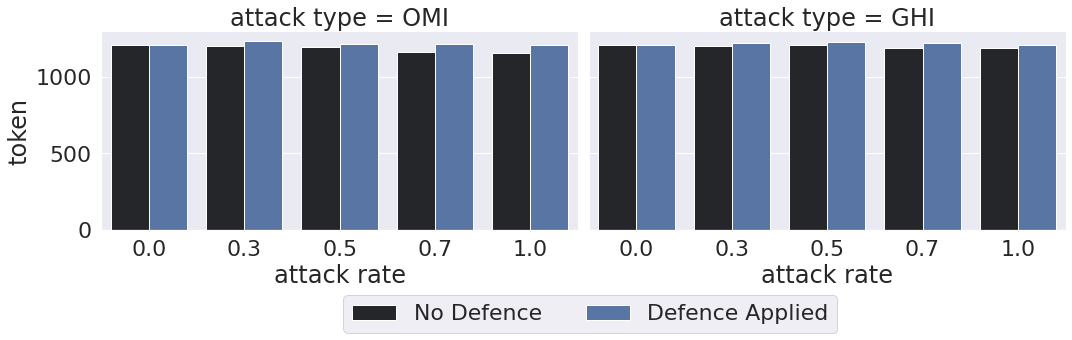

In [15]:
df = pd.DataFrame(token)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True, height=5, aspect=1.5)
g.map(sns.barplot, 'attack rate', 'token', 'defence')
# g.add_legend()
plt.subplots_adjust(bottom=0.35)
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.55, 0.2), ncol=len(labels))
plt.savefig(f"{EXP_DIR}/token.png", bbox_inches='tight')
plt.show()

In [16]:
response_time = {
    "attack rate": [0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1
                    ],
    "response time": [4.7, 4.5, 6.7, 5.7, 5.3, 
               4.7, 5.6, 6.4, 6.5,7.1,
                  4.7, 5.2, 5.7, 5.7, 5.5,
               4.7, 4.8, 9.3, 6.1, 7.5
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", "OMI", 
                    "OMI","OMI","OMI","OMI","OMI", 
                    "GHI","GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied", "Defence Applied",             
                ],
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

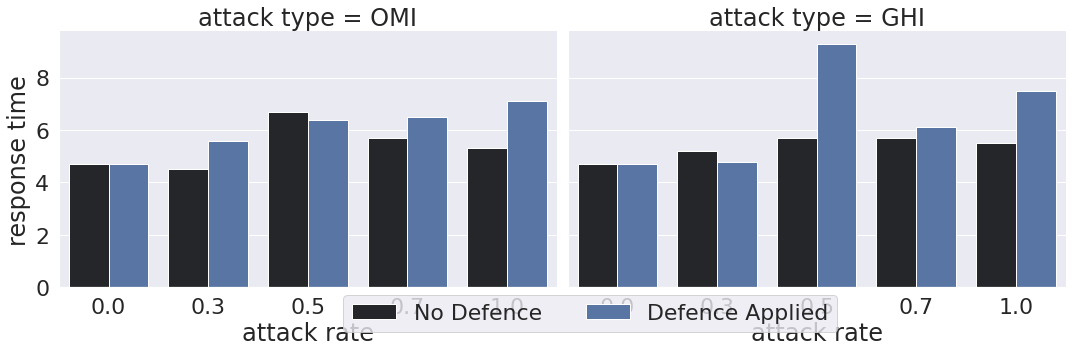

In [17]:
df = pd.DataFrame(response_time)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True, height=5, aspect=1.5)
g.map(sns.barplot, 'attack rate', 'response time', 'defence')
# g.add_legend()
# for ax in g.axes.flat:
#     handles, labels = ax.get_legend_handles_labels()
#     if handles:
#         g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels))
#         break

# Adjust layout to make space for the legend
# plt.subplots_adjust(bottom=0.35)
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.55, 0.2), ncol=len(labels))
plt.savefig(f"{EXP_DIR}/response_time.png", bbox_inches='tight')
plt.show()

In [18]:
# Define the attack rates
attack_rates = [0.0, 0.3, 0.5, 0.7, 1.0]

# Define improvements for each metric
# Precision improvements
precision_omi_no_defence = [0.6, 0.8, 0.8, 1.0]
precision_omi_defence = [1.0, 1.0, 0.8, 1.0]
precision_ghi_no_defence = [0.0, 0.0, 0.0, 0.0]
precision_ghi_defence = [0.9, 0.6, 1.0, 1.0]

# Recall improvements
recall_omi_no_defence = [0.25, 0.33, 0.19, 0.24]
recall_omi_defence = [0.4, 0.31, 0.21, 0.33]
recall_ghi_no_defence = [0.0, 0.0, 0.0, 0.0]
recall_ghi_defence = [0.54, 0.13, 0.37, 0.32]

# F1-score improvements
f1_omi_no_defence = [0.35, 0.46, 0.3, 0.39]
f1_omi_defence = [0.55, 0.46, 0.33, 0.47]
f1_ghi_no_defence = [0.0, 0.0, 0.0, 0.0]
f1_ghi_defence = [0.65, 0.21, 0.52, 0.46]

# MOER improvements
moer_omi_no_defence = [0.5, 0.17, 0.13, 0.25, 0.26]
moer_omi_defence = [0.5, 0.48, 0.29, 0.4, 0.67]
moer_ghi_no_defence = [0.5, 0.16, 0.14, 0.1, 0.13]
moer_ghi_defence = [0.5, 0.33, 0.48, 0.132, 0.14]

# Token usage increase
token_omi_no_defence = [1204, 1198, 1194, 1162, 1154]
token_omi_defence = [1204, 1230, 1211, 1216, 1207]
token_ghi_no_defence = [1204, 1203, 1204, 1186, 1188]
token_ghi_defence = [1204, 1219, 1225, 1222, 1206]

# Response time increase
response_time_omi_no_defence = [4.7, 4.5, 6.7, 5.7, 5.3]
response_time_omi_defence = [4.7, 5.6, 6.4, 6.5, 7.1]
response_time_ghi_no_defence = [4.7, 5.2, 5.7, 5.7, 5.5]
response_time_ghi_defence = [4.7, 4.8, 9.3, 6.1, 7.5]

# Calculate weighted improvements for precision, recall, and F1-score
weighted_precision_omi = sum((d - n) / n * ar for d, n, ar in zip(precision_omi_defence, precision_omi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])



weighted_precision_ghi = sum((d - n) / 1 * ar for d, n, ar in zip(precision_ghi_defence, precision_ghi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])

wpi = (weighted_precision_omi + weighted_precision_ghi) / 2
print(f"WPI: {wpi}")


weighted_recall_omi = sum((d - n) / n * ar for d, n, ar in zip(recall_omi_defence, recall_omi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])
weighted_recall_ghi = sum((d - n) / 1 * ar for d, n, ar in zip(recall_ghi_defence, recall_ghi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])

wri = (weighted_recall_omi + weighted_recall_ghi) / 2
print(f"WRI: {wri}")


weighted_f1_omi = sum((d - n) / n * ar for d, n, ar in zip(f1_omi_defence, f1_omi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])
weighted_f1_ghi = sum((d - n) / 1 * ar for d, n, ar in zip(f1_ghi_defence, f1_ghi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])

wfi = (weighted_f1_omi + weighted_f1_ghi) / 2
print(f"WFI: {wfi}")

# Calculate weighted improvements for MOER, token usage, and response time
weighted_moer_omi = sum((d - n) / n * ar for d, n, ar in zip(moer_omi_defence, moer_omi_no_defence, attack_rates)) / sum(attack_rates)
weighted_moer_ghi = sum((d - n) / n * ar for d, n, ar in zip(moer_ghi_defence, moer_ghi_no_defence, attack_rates)) / sum(attack_rates)

wmi = (weighted_moer_omi + weighted_moer_ghi) / 2
print(f"WMI: {wmi}")

weighted_token_omi = sum((d - n) / n * ar for d, n, ar in zip(token_omi_defence, token_omi_no_defence, attack_rates)) / sum(attack_rates)
weighted_token_ghi = sum((d - n) / n * ar for d, n, ar in zip(token_ghi_defence, token_ghi_no_defence, attack_rates)) / sum(attack_rates)

wtu = (weighted_token_omi + weighted_token_ghi) / 2
print(f"WTU: {wtu}")


weighted_response_time_omi = sum((d - n) / n * ar for d, n, ar in zip(response_time_omi_defence, response_time_omi_no_defence, attack_rates)) / sum(attack_rates)
weighted_response_time_ghi = sum((d - n) / n * ar for d, n, ar in zip(response_time_ghi_defence, response_time_ghi_no_defence, attack_rates)) / sum(attack_rates)

wrt = (weighted_response_time_omi + weighted_response_time_ghi) / 2
print(f"WRT: {wrt}")


# Calculate overall attack detection improvement
overall_attack_detection_improvement = (weighted_precision_omi + weighted_precision_ghi + weighted_recall_omi + weighted_recall_ghi + weighted_f1_omi + weighted_f1_ghi) / 6

print(f"OADI: {overall_attack_detection_improvement}")


# Calculate overall performance improvement
overall_performance_improvement = (weighted_moer_omi + weighted_moer_ghi - weighted_token_omi - weighted_token_ghi - weighted_response_time_omi - weighted_response_time_ghi) / 6

print(f"OPI: {overall_performance_improvement}")



# Calculate the general value considering both attack detection and performance improvements
general_improvement = (overall_attack_detection_improvement + overall_performance_improvement) / 2
print(f"GI: {general_improvement}")

WPI: 0.519
WRI: 0.2808762360446571
WFI: 0.31411135531135526
WMI: 0.998665061409179
WTU: 0.028539995229816442
WRT: 0.23885705008751149
OADI: 0.3713291971186708
OPI: 0.24375600536395037
GI: 0.3075426012413106


In [19]:
# Define the attack rates
attack_rates = [0.0, 0.3, 0.5, 0.7, 1.0]

# Define improvements for each metric
# Precision improvements for OMI and GHI
precision_omi_no_def = [0.6, 0.8, 0.8, 1.0]
precision_omi_def = [1.0, 1.0, 0.8, 1.0]
precision_ghi_no_def = [0.0, 0.0, 0.0, 0.0]
precision_ghi_def = [0.9, 0.6, 1.0, 1.0]

# Recall improvements for OMI and GHI
recall_omi_no_def = [0.25, 0.33, 0.19, 0.24]
recall_omi_def = [0.4, 0.31, 0.21, 0.33]
recall_ghi_no_def = [0.0, 0.0, 0.0, 0.0]
recall_ghi_def = [0.54, 0.13, 0.37, 0.32]

# F1-score improvements for OMI and GHI
f1_omi_no_def = [0.35, 0.46, 0.3, 0.39]
f1_omi_def = [0.55, 0.46, 0.33, 0.47]
f1_ghi_no_def = [0.0, 0.0, 0.0, 0.0]
f1_ghi_def = [0.65, 0.21, 0.52, 0.46]

# MOER improvements for OMI and GHI
moer_omi_no_def = [0.5, 0.17, 0.13, 0.25, 0.26]
moer_omi_def = [0.5, 0.48, 0.29, 0.4, 0.67]
moer_ghi_no_def = [0.5, 0.16, 0.14, 0.1, 0.13]
moer_ghi_def = [0.5, 0.33, 0.48, 0.132, 0.14]

# Token usage increase for OMI and GHI
token_omi_no_def = [1204, 1198, 1194, 1162, 1154]
token_omi_def = [1204, 1230, 1211, 1216, 1207]
token_ghi_no_def = [1204, 1203, 1204, 1186, 1188]
token_ghi_def = [1204, 1219, 1225, 1222, 1206]

# Response time increase for OMI and GHI
response_time_omi_no_def = [4.7, 4.5, 6.7, 5.7, 5.3]
response_time_omi_def = [4.7, 5.6, 6.4, 6.5, 7.1]
response_time_ghi_no_def = [4.7, 5.2, 5.7, 5.7, 5.5]
response_time_ghi_def = [4.7, 4.8, 9.3, 6.1, 7.5]

# Calculate and print weighted metrics before and after applying defense for each metric
# Precision
weighted_precision_omi_no_def = sum(n * ar for n, ar in zip(precision_omi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_precision_omi_def = sum(d * ar for d, ar in zip(precision_omi_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_precision_ghi_no_def = sum(n * ar for n, ar in zip(precision_ghi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_precision_ghi_def = sum(d * ar for d, ar in zip(precision_ghi_def, attack_rates[1:])) / sum(attack_rates[1:])

# Calculate weighted precision improvement using the alternative formula
wpi = sum((d - n) / n * ar for d, n, ar in zip(precision_omi_def, precision_omi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
wpi_ghi = sum((d - n) / (n if n != 0 else 1) * ar for d, n, ar in zip(precision_ghi_def, precision_ghi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_precision_improvement = (wpi + wpi_ghi) / 2

print(f"Weighted Precision OMI (No Defence): {weighted_precision_omi_no_def}")
print(f"Weighted Precision OMI (With Defence): {weighted_precision_omi_def}")
print(f"Weighted Precision GHI (No Defence): {weighted_precision_ghi_no_def}")
print(f"Weighted Precision GHI (With Defence): {weighted_precision_ghi_def}")
print(f"Weighted Precision Improvement OMI: {wpi}")
print(f"Weighted Precision Improvement GHI: {wpi_ghi}")
print(f"Weighted Precision Improvement (Average): {weighted_precision_improvement}")

# Recall
weighted_recall_omi_no_def = sum(n * ar for n, ar in zip(recall_omi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_recall_omi_def = sum(d * ar for d, ar in zip(recall_omi_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_recall_ghi_no_def = sum(n * ar for n, ar in zip(recall_ghi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_recall_ghi_def = sum(d * ar for d, ar in zip(recall_ghi_def, attack_rates[1:])) / sum(attack_rates[1:])

# Calculate weighted recall improvement using the alternative formula
wri = sum((d - n) / n * ar for d, n, ar in zip(recall_omi_def, recall_omi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
wri_ghi = sum((d - n) / (n if n != 0 else 1) * ar for d, n, ar in zip(recall_ghi_def, recall_ghi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_recall_improvement = (wri + wri_ghi) / 2

print(f"Weighted Recall OMI (No Defence): {weighted_recall_omi_no_def}")
print(f"Weighted Recall OMI (With Defence): {weighted_recall_omi_def}")
print(f"Weighted Recall GHI (No Defence): {weighted_recall_ghi_no_def}")
print(f"Weighted Recall GHI (With Defence): {weighted_recall_ghi_def}")
print(f"Weighted Recall Improvement OMI: {wri}")
print(f"Weighted Recall Improvement GHI: {wri_ghi}")
print(f"Weighted Recall Improvement (Average): {weighted_recall_improvement}")

# F1-score
weighted_f1_omi_no_def = sum(n * ar for n, ar in zip(f1_omi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_f1_omi_def = sum(d * ar for d, ar in zip(f1_omi_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_f1_ghi_no_def = sum(n * ar for n, ar in zip(f1_ghi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_f1_ghi_def = sum(d * ar for d, ar in zip(f1_ghi_def, attack_rates[1:])) / sum(attack_rates[1:])

# Calculate weighted F1-score improvement using the alternative formula
wfi = sum((d - n) / n * ar for d, n, ar in zip(f1_omi_def, f1_omi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
wfi_ghi = sum((d - n) / (n if n != 0 else 1) * ar for d, n, ar in zip(f1_ghi_def, f1_ghi_no_def, attack_rates[1:])) / sum(attack_rates[1:])
weighted_f1_improvement = (wfi + wfi_ghi) / 2

print(f"Weighted F1 OMI (No Defence): {weighted_f1_omi_no_def}")
print(f"Weighted F1 OMI (With Defence): {weighted_f1_omi_def}")
print(f"Weighted F1 GHI (No Defence): {weighted_f1_ghi_no_def}")
print(f"Weighted F1 GHI (With Defence): {weighted_f1_ghi_def}")
print(f"Weighted F1 Improvement OMI: {wfi}")
print(f"Weighted F1 Improvement GHI: {wfi_ghi}")
print(f"Weighted F1 Improvement (Average): {weighted_f1_improvement}")

# MOER
weighted_moer_omi_no_def = sum(n * ar for n, ar in zip(moer_omi_no_def, attack_rates)) / sum(attack_rates)
weighted_moer_omi_def = sum(d * ar for d, ar in zip(moer_omi_def, attack_rates)) / sum(attack_rates)
weighted_moer_ghi_no_def = sum(n * ar for n, ar in zip(moer_ghi_no_def, attack_rates)) / sum(attack_rates)
weighted_moer_ghi_def = sum(d * ar for d, ar in zip(moer_ghi_def, attack_rates)) / sum(attack_rates)

# Calculate weighted MOER improvement using the alternative formula
wmi = sum((d - n) / n * ar for d, n, ar in zip(moer_omi_def, moer_omi_no_def, attack_rates)) / sum(attack_rates)
wmi_ghi = sum((d - n) / (n if n != 0 else 1) * ar for d, n, ar in zip(moer_ghi_def, moer_ghi_no_def, attack_rates)) / sum(attack_rates)
weighted_moer_improvement = (wmi + wmi_ghi) / 2

print(f"Weighted MOER OMI (No Defence): {weighted_moer_omi_no_def}")
print(f"Weighted MOER OMI (With Defence): {weighted_moer_omi_def}")
print(f"Weighted MOER GHI (No Defence): {weighted_moer_ghi_no_def}")
print(f"Weighted MOER GHI (With Defence): {weighted_moer_ghi_def}")
print(f"Weighted MOER Improvement OMI: {wmi}")
print(f"Weighted MOER Improvement GHI: {wmi_ghi}")
print(f"Weighted MOER Improvement (Average): {weighted_moer_improvement}")

# Token Usage
weighted_token_omi_no_def = sum(n * ar for n, ar in zip(token_omi_no_def, attack_rates)) / sum(attack_rates)
weighted_token_omi_def = sum(d * ar for d, ar in zip(token_omi_def, attack_rates)) / sum(attack_rates)
weighted_token_ghi_no_def = sum(n * ar for n, ar in zip(token_ghi_no_def, attack_rates)) / sum(attack_rates)
weighted_token_ghi_def = sum(d * ar for d, ar in zip(token_ghi_def, attack_rates)) / sum(attack_rates)

# Calculate weighted token usage improvement using the alternative formula
wtu = sum((d - n) / n * ar for d, n, ar in zip(token_omi_def, token_omi_no_def, attack_rates)) / sum(attack_rates)
wtu_ghi = sum((d - n) / (n if n != 0 else 1) * ar for d, n, ar in zip(token_ghi_def, token_ghi_no_def, attack_rates)) / sum(attack_rates)
weighted_token_usage_improvement = (wtu + wtu_ghi) / 2

print(f"Weighted Token Usage OMI (No Defence): {weighted_token_omi_no_def}")
print(f"Weighted Token Usage OMI (With Defence): {weighted_token_omi_def}")
print(f"Weighted Token Usage GHI (No Defence): {weighted_token_ghi_no_def}")
print(f"Weighted Token Usage GHI (With Defence): {weighted_token_ghi_def}")
print(f"Weighted Token Usage Improvement OMI: {wtu}")
print(f"Weighted Token Usage Improvement GHI: {wtu_ghi}")
print(f"Weighted Token Usage Improvement (Average): {weighted_token_usage_improvement}")

# Response Time
weighted_response_time_omi_no_def = sum(n * ar for n, ar in zip(response_time_omi_no_def, attack_rates)) / sum(attack_rates)
weighted_response_time_omi_def = sum(d * ar for d, ar in zip(response_time_omi_def, attack_rates)) / sum(attack_rates)
weighted_response_time_ghi_no_def = sum(n * ar for n, ar in zip(response_time_ghi_no_def, attack_rates)) / sum(attack_rates)
weighted_response_time_ghi_def = sum(d * ar for d, ar in zip(response_time_ghi_def, attack_rates)) / sum(attack_rates)

# Calculate weighted response time improvement using the alternative formula
wrt = sum((d - n) / n * ar for d, n, ar in zip(response_time_omi_def, response_time_omi_no_def, attack_rates)) / sum(attack_rates)
wrt_ghi = sum((d - n) / (n if n != 0 else 1) * ar for d, n, ar in zip(response_time_ghi_def, response_time_ghi_no_def, attack_rates)) / sum(attack_rates)
weighted_response_time_improvement = (wrt + wrt_ghi) / 2

print(f"Weighted Response Time OMI (No Defence): {weighted_response_time_omi_no_def}")
print(f"Weighted Response Time OMI (With Defence): {weighted_response_time_omi_def}")
print(f"Weighted Response Time GHI (No Defence): {weighted_response_time_ghi_no_def}")
print(f"Weighted Response Time GHI (With Defence): {weighted_response_time_ghi_def}")
print(f"Weighted Response Time Improvement OMI: {wrt}")
print(f"Weighted Response Time Improvement GHI: {wrt_ghi}")
print(f"Weighted Response Time Improvement (Average): {weighted_response_time_improvement}")

Weighted Precision OMI (No Defence): 0.8560000000000001
Weighted Precision OMI (With Defence): 0.944
Weighted Precision GHI (No Defence): 0.0
Weighted Precision GHI (With Defence): 0.908
Weighted Precision Improvement OMI: 0.12999999999999998
Weighted Precision Improvement GHI: 0.908
Weighted Precision Improvement (Average): 0.519
Weighted Recall OMI (No Defence): 0.2452
Weighted Recall OMI (With Defence): 0.3008
Weighted Recall GHI (No Defence): 0.0
Weighted Recall GHI (With Defence): 0.3224
Weighted Recall Improvement OMI: 0.23935247208931423
Weighted Recall Improvement GHI: 0.3224
Weighted Recall Improvement (Average): 0.2808762360446571
Weighted F1 OMI (No Defence): 0.374
Weighted F1 OMI (With Defence): 0.4384
Weighted F1 GHI (No Defence): 0.0
Weighted F1 GHI (With Defence): 0.44959999999999994
Weighted F1 Improvement OMI: 0.17862271062271062
Weighted F1 Improvement GHI: 0.44959999999999994
Weighted F1 Improvement (Average): 0.31411135531135526
Weighted MOER OMI (No Defence): 0.220

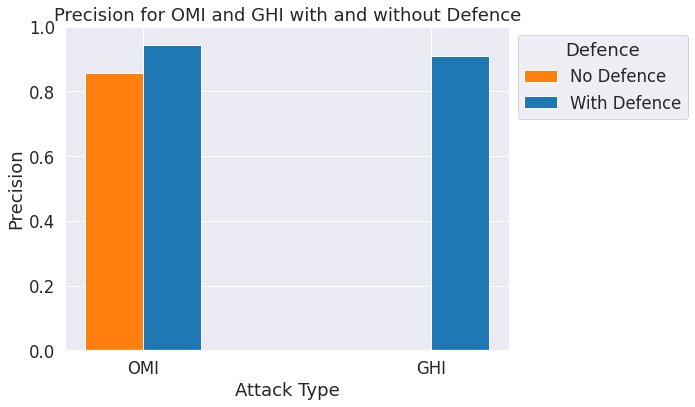

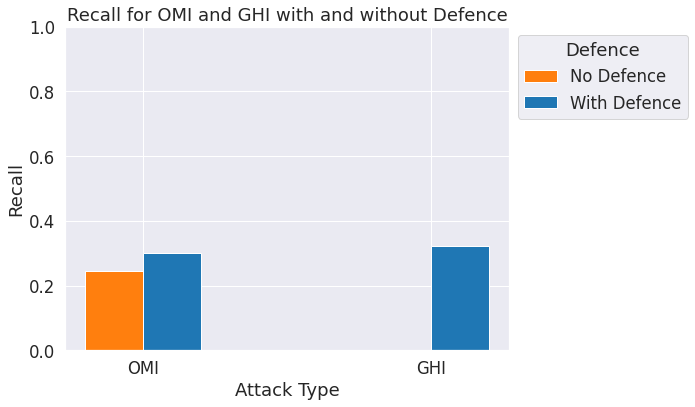

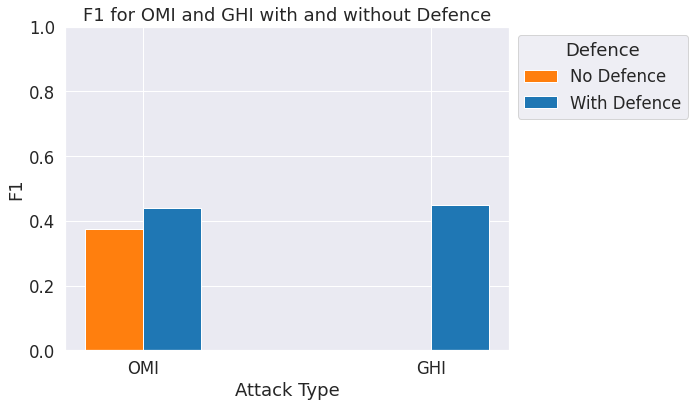

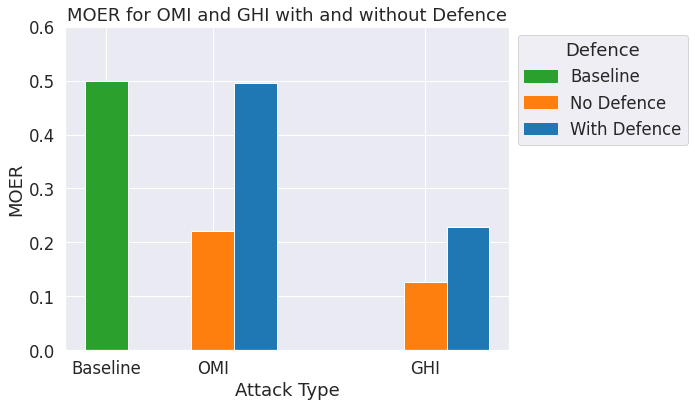

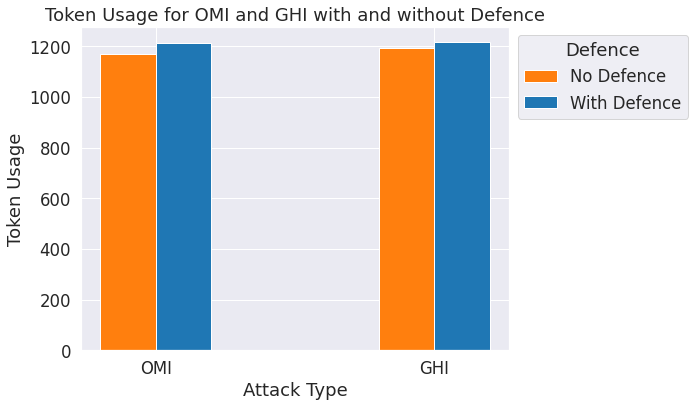

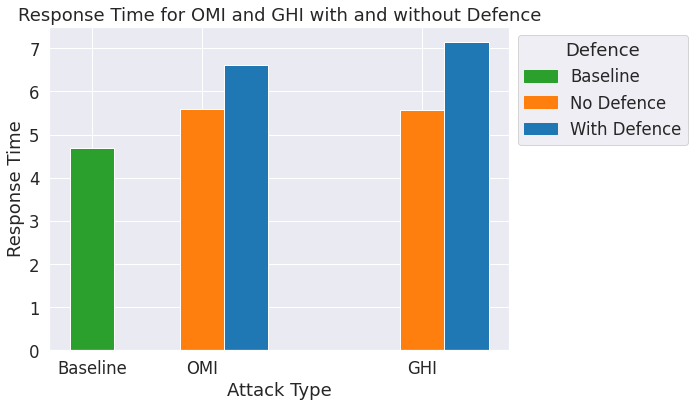

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define a consistent color palette
custom_palette = {
    'With Defence': '#1f77b4',  # Blue
    'No Defence': '#ff7f0e',  # Orange
    'Baseline': '#2ca02c'  # Green
}

# Create DataFrames (same as before)
precision_df = pd.DataFrame({
    'Attack Type': ['OMI', 'OMI', 'GHI', 'GHI'],
    'Defence': ['No Defence', 'With Defence', 'No Defence', 'With Defence'],
    'Precision': [0.856, 0.944, 0.0, 0.908]
})

recall_df = pd.DataFrame({
    'Attack Type': ['OMI', 'OMI', 'GHI', 'GHI'],
    'Defence': ['No Defence', 'With Defence', 'No Defence', 'With Defence'],
    'Recall': [0.2452, 0.3008, 0.0, 0.3224]
})

f1_df = pd.DataFrame({
    'Attack Type': ['OMI', 'OMI', 'GHI', 'GHI'],
    'Defence': ['No Defence', 'With Defence', 'No Defence', 'With Defence'],
    'F1': [0.374, 0.4384, 0.0, 0.4496]
})

moer_df = pd.DataFrame({
    'Attack Type': ['Baseline', 'OMI', 'OMI', 'GHI', 'GHI', 'Baseline'],
    'Defence': ['Baseline', 'No Defence', 'With Defence', 'No Defence', 'With Defence', 'Baseline'],
    'MOER': [0.5, 0.2204, 0.4956, 0.1272, 0.22856, 0.5]
})

token_usage_df = pd.DataFrame({
    'Attack Type': ['OMI', 'OMI', 'GHI', 'GHI'],
    'Defence': ['No Defence', 'With Defence', 'No Defence', 'With Defence'],
    'Token Usage': [1169.52, 1213.08, 1192.44, 1215.84]
})

response_time_df = pd.DataFrame({
    'Attack Type': ['Baseline', 'OMI', 'OMI', 'GHI', 'GHI'],
    'Defence': ['Baseline', 'No Defence', 'With Defence', 'No Defence', 'With Defence'],
    'Response Time': [4.7, 5.596, 6.612, 5.56, 7.144]
})

# General plotting function for regular datasets
def plot_fixed_bar_width(df, x, y, hue, title, ylabel, ylim=None, save_path=None):
    unique_x = df[x].unique()
    unique_hue = df[hue].unique()

    x_pos = np.arange(len(unique_x))
    bar_width = 0.2
    num_hue = len(unique_hue)

    plt.figure(figsize=(10, 6))
    
    for i, hue_val in enumerate(unique_hue):
        subset = df[df[hue] == hue_val]
        bar_offset = (i - (num_hue - 1) / 2) * bar_width
        plt.bar(x_pos + bar_offset, subset[y], width=bar_width, label=hue_val,
                color=custom_palette[hue_val])
    
    plt.xticks(x_pos, unique_x)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Attack Type')
    if ylim:
        plt.ylim(0, ylim)
    plt.legend(title='Defence', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    # Save figure if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

# Special plotting function for MOER and Response Time with Baseline
def plot_with_baseline(df, x, y, hue, title, ylabel, ylim=None, save_path=None):
    # Separate 'Baseline' from other attack types
    baseline_df = df[df[x] == 'Baseline']
    non_baseline_df = df[df[x] != 'Baseline']

    unique_x = non_baseline_df[x].unique()
    unique_hue = df[hue].unique()

    x_pos = np.arange(len(unique_x))  # Positions for non-baseline bars
    bar_width = 0.2
    num_hue = len(unique_hue)

    plt.figure(figsize=(10, 6))

    # Plot the baseline bars
    if not baseline_df.empty:
        for i, hue_val in enumerate(unique_hue):
            subset = baseline_df[baseline_df[hue] == hue_val]
            if not subset.empty:
                plt.bar(-0.5 + i * bar_width, subset[y].values[0], 
                        width=bar_width, color=custom_palette[hue_val])

    # Plot the non-baseline bars
    for i, hue_val in enumerate(unique_hue):
        subset = non_baseline_df[non_baseline_df[hue] == hue_val]
        if not subset.empty:
            bar_offset = (i - (num_hue - 1) / 2) * bar_width
            plt.bar(x_pos + bar_offset, subset[y], width=bar_width, color=custom_palette[hue_val])
    
    plt.xticks(np.append(-0.5, x_pos), ['Baseline'] + list(unique_x))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Attack Type')
    if ylim:
        plt.ylim(0, ylim)

    # Add legend explicitly with all categories
    handles = [plt.Rectangle((0,0),1,1, color=custom_palette[hue]) for hue in unique_hue]
    plt.legend(handles, unique_hue, title='Defence', loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()

    # Save figure if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

# Plotting metrics with save paths
plot_fixed_bar_width(precision_df, 'Attack Type', 'Precision', 'Defence', 
                     'Precision for OMI and GHI with and without Defence', 'Precision', 1,
                     save_path='precision_plot.png')

plot_fixed_bar_width(recall_df, 'Attack Type', 'Recall', 'Defence', 
                     'Recall for OMI and GHI with and without Defence', 'Recall', 1,
                     save_path='recall_plot.png')

plot_fixed_bar_width(f1_df, 'Attack Type', 'F1', 'Defence', 
                     'F1 for OMI and GHI with and without Defence', 'F1', 1,
                     save_path='f1_plot.png')

plot_with_baseline(moer_df, 'Attack Type', 'MOER', 'Defence', 
                   'MOER for OMI and GHI with and without Defence', 'MOER', 0.6,
                   save_path='moer_plot.png')

plot_fixed_bar_width(token_usage_df, 'Attack Type', 'Token Usage', 'Defence', 
                     'Token Usage for OMI and GHI with and without Defence', 'Token Usage',
                     save_path='token_usage_plot.png')

plot_with_baseline(response_time_df, 'Attack Type', 'Response Time', 'Defence', 
                   'Response Time for OMI and GHI with and without Defence', 'Response Time',
                   save_path='response_time_plot.png')
